# Stack Overflow Developer Survey 2025 – Exploratory Insights

This notebook focuses solely on exploratory insights derived from the cleaned SO2025 developer survey dataset.

Following the data cleaning and preparation completed earlier, this analysis explores patterns across:
- Demographics
- Developer experience
- Technology stacks
- Workplace behavior
- Salary and earnings
- AI usage and sentiment

The goal is to uncover meaningful relationships that help explain how developers learn, work, earn, and adapt to evolving technologies.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [100]:
plt.style.use('fivethirtyeight')

### 1. Importing Dataset

In [2]:
clean_df = pd.read_csv("../datasets/cleaned_survey_results.csv")

In [3]:
clean_df.head(2)

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,LearningMethods,YearsCode,DevType,RemoteWork,...,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,CommPlatformHaveWorkedWith,UsedAIBefore,AIModelsHaveWorkedWith,AIToolsUsage,AISentiment,AnnualSalary(USD),AIToolCurrently_partially_AI,AIToolCurrently_mostly_AI
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,8.0,Online Courses or Certification (includes all ...,14.0,"Developer, mobile",Remote,...,"['Windows', 'MacOS', 'Android', 'iOS', 'iPadOS']","['Confluence', 'GitHub', 'GitLab', 'Jira', 'Ma...","['Stack Overflow', 'Reddit', 'GitHub (public p...",Yes,"['openAI GPT (chatbot models)', 'openAI Image ...","Yes, I use AI tools monthly or infrequently",Indifferent,61256.0,"['Learning about a codebase', 'Writing code', ...",NaN
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,2.0,Online Courses or Certification (includes all ...,10.0,"Developer, back-end",Hybrid,...,NaN,"['Confluence', 'GitHub', 'Jira']","['Stack Overflow', 'Discord', 'Reddit', 'Dev.t...",Yes,NaN,"Yes, I use AI tools weekly",Indifferent,104413.0,NaN,NaN


### 2. Exploratory Data Insights

#### 2.1 Demographics and Background

What percentage of respondents `work as devs by profession` for each `country`?

In [87]:
total_devs_by_countries = clean_df.groupby(['Country']).size()
professional_devs_by_countries = clean_df[clean_df['MainBranch'] == 'I am a developer by profession'].groupby(['Country']).size()

In [129]:
pro_dev_df = pd.DataFrame({
    'total_respondents': total_devs_by_countries,
    'pro_devs': professional_devs_by_countries
})
pro_dev_df = pro_dev_df.reset_index()
pro_dev_df['percent_pro'] = round(pro_dev_df['pro_devs'] / pro_dev_df['total_respondents'] * 100, 2)

top10 = (pro_dev_df[pro_dev_df['total_respondents'] >= 100].sort_values(['percent_pro'],ascending=False).head(20))

In [134]:
top10_plot = top10.copy()

top10_plot['Country'] = top10_plot['Country'].str.replace(
    r',.*', '', regex=True
)

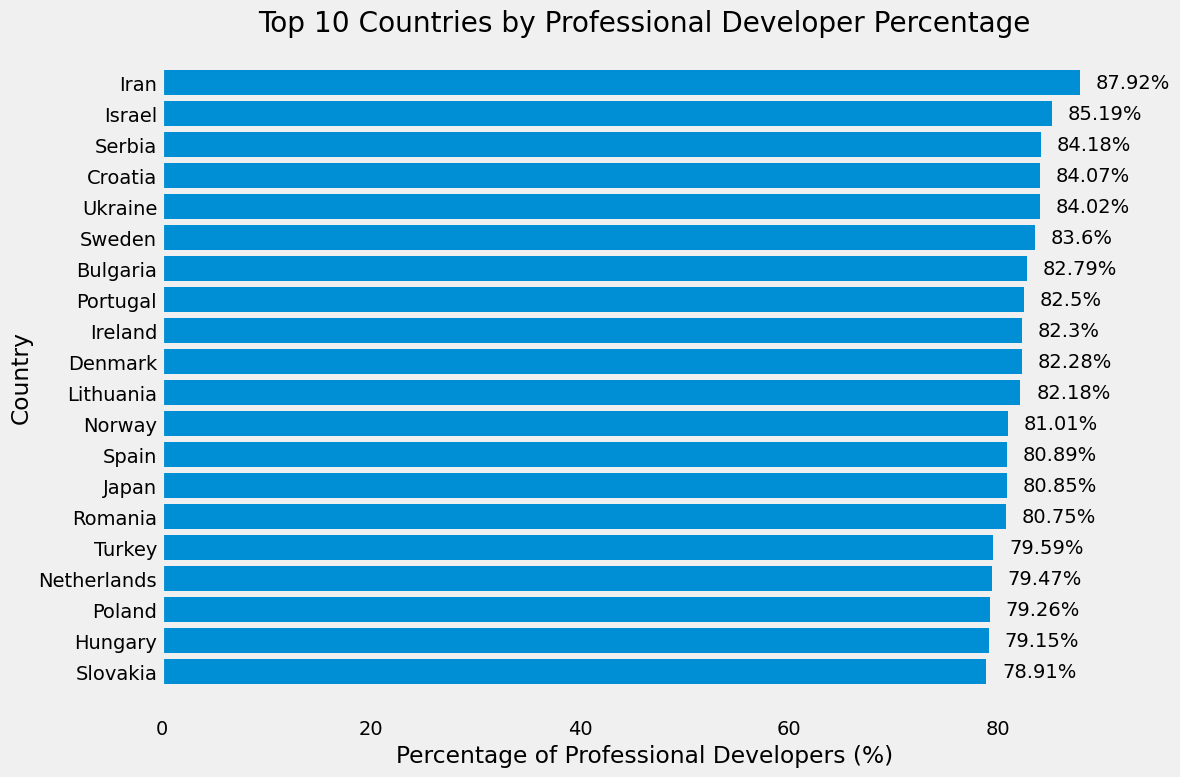

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(top10_plot['Country'], top10_plot['percent_pro'])
plt.gca().invert_yaxis()

# Titles and labels
plt.title('Top 20 Countries by Professional Developer Percentage')
plt.xlabel('Percentage of Professional Developers (%)')
plt.ylabel('Country')

for index, value in enumerate(top10_plot['percent_pro']):
    plt.text(value + 1.5, index, f"{value}%", va='center')

plt.tight_layout()
plt.grid()
plt.show()

What percentage of respondents `work as professional devs` in `India`?
> 72.46%

In [26]:
round(clean_df.loc[clean_df['Country'] == 'India','MainBranch'].value_counts(normalize=True) * 100, 3)

MainBranch
I am a developer by profession                                                                72.463
I am learning to code                                                                         12.116
I am not primarily a developer, but I write code sometimes as part of my work/studies          8.655
I code primarily as a hobby                                                                    2.754
I work with developers or my work supports developers but am not a developer by profession     2.400
I used to be a developer by profession, but no longer am                                       1.613
Name: proportion, dtype: float64